In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
#matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns
sns.set(style='whitegrid', font_scale=0.7, rc={"lines.linewidth": 1.5,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [2]:
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
    ConfigParser = configparser.SafeConfigParser
else:
    ConfigParser = configparser.ConfigParser

In [3]:
fisherfile = '../datatest/fisher_dc_updated_abund-clustering_2018-11-23-16-13-15-EST.pkl'
oldfisherfile = '../data/savedFisher_S4-1.0-CDT_grid-owl2_owl2_v0.7_planck_mwwcdm_py3.pkl'
paramsfile = '../datatest/S4-1.0-CDT_grid-owl2_v0.6_params_2018-11-20-11-42-30-EST.npy'

params = np.load(paramsfile).item()

with open(fisherfile, 'rb') as pickle_file:
    fisher = pickle.load(pickle_file)
    
with open(oldfisherfile, 'rb') as pickle_file:
    oldfisher = pickle.load(pickle_file)

In [4]:
fisher = FisherMatrix(fisher.values, fisher.columns.values)

/Users/dylan/Development/orphics/orphics/stats.py:203: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [5]:
oldfisher = FisherMatrix(oldfisher[1], oldfisher[0])

In [6]:
constraints = fisher.sigmas()
oldconstraints = oldfisher.sigmas()

In [7]:
def _get_latex_params(inifile):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items('fisher-clustering', 'paramLatexList')[0][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}
for index,key in enumerate(params):
    latex_paramdict[key] = latex_params[index]

In [8]:
params_to_plot = ['As', 'H0', 'mnu', 'ombh2', 'omch2', 'w0', 'wa', 'ns']
constraints_to_plot = [constraints[par] for par in params_to_plot]
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [9]:
import pandas as pd

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure

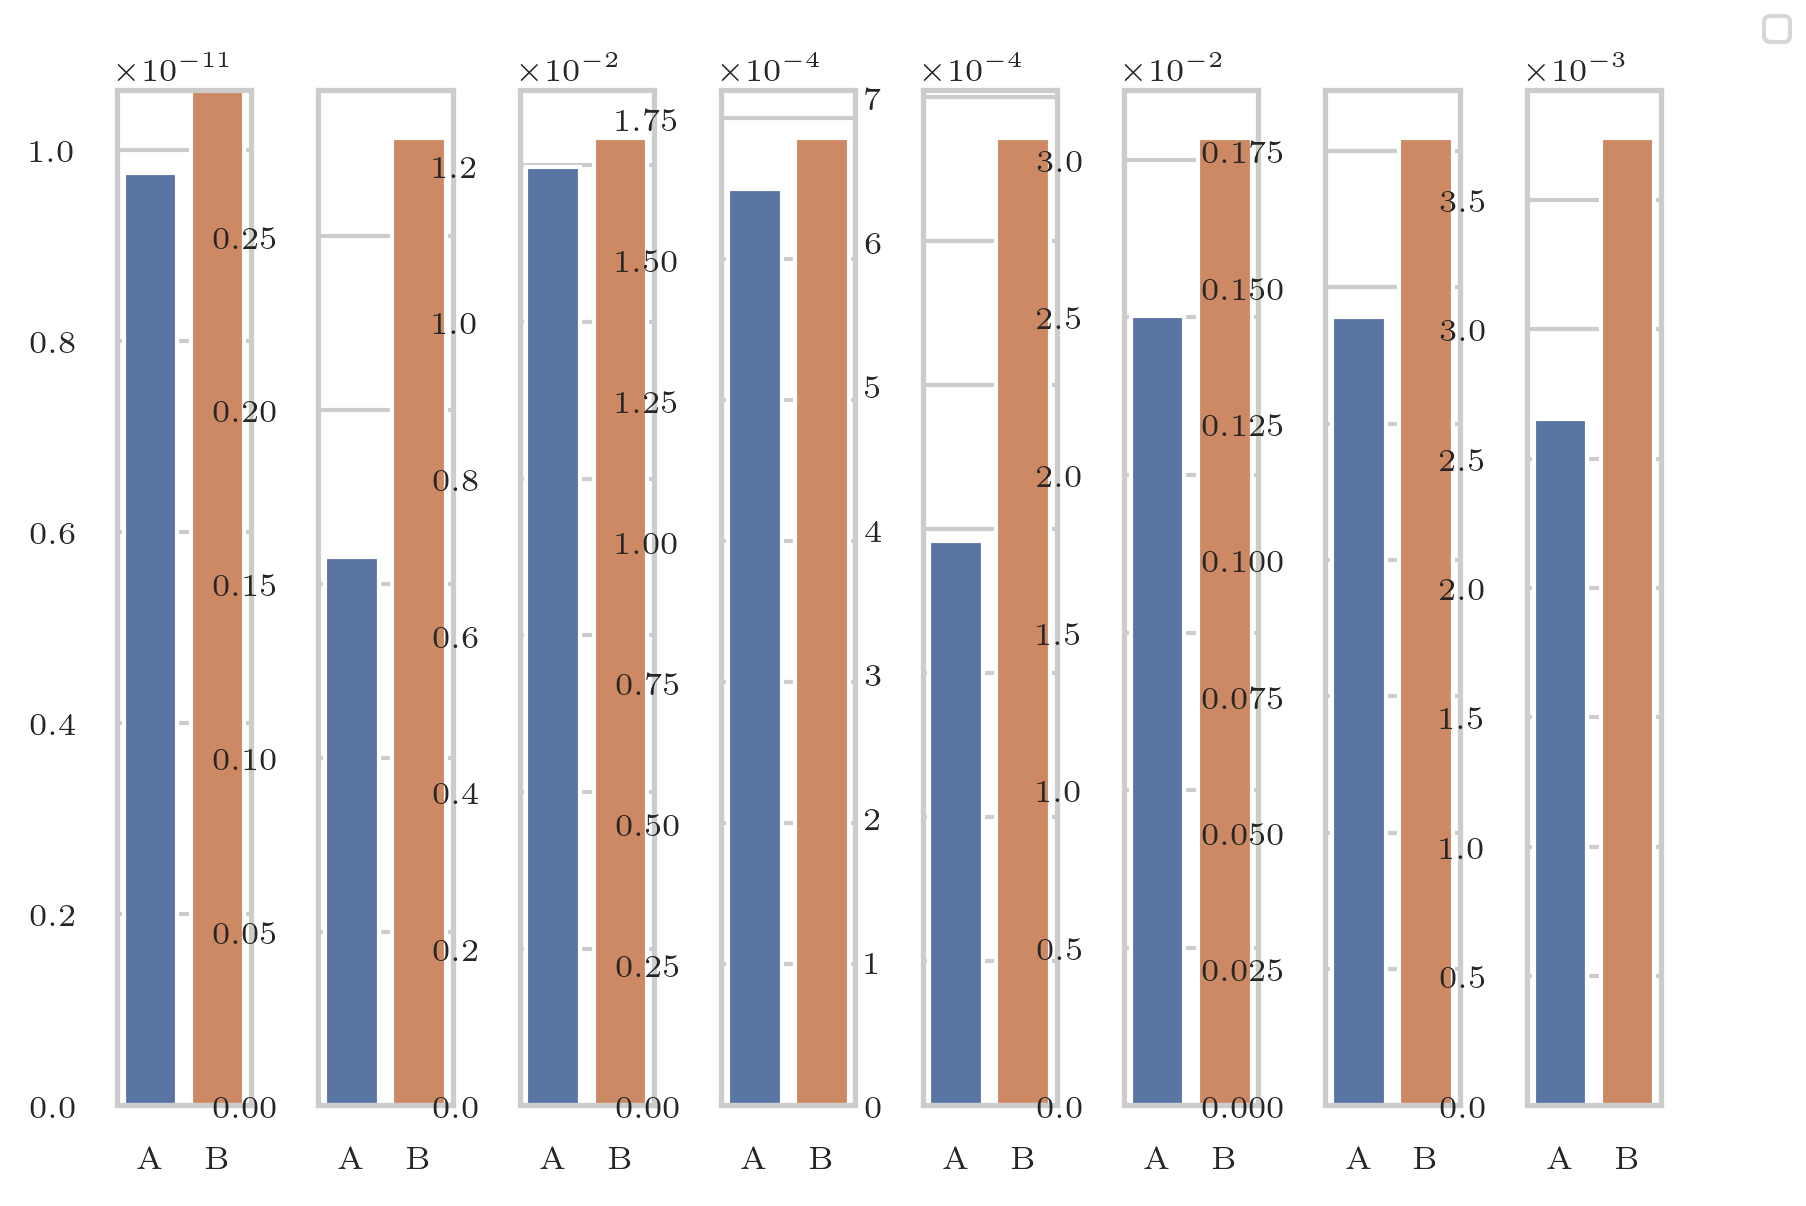

In [16]:
fig,axes = plt.subplots(1,len(params_to_plot))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    names = ['A', 'B']
    sigmas = np.array([constraints[param], oldconstraints[param]])
    df = pd.DataFrame({'names':names, 'sigmas':sigmas})
    sns.barplot(x="names", y="sigmas", data=df, ax=axes[index])
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    
fig = plt.gcf()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='best')
fig.tight_layout()